In [7]:
import math
import numpy as np
import matplotlib.pyplot as plt

import qiskit

from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer, AerSimulator

#Importing important libraries such as Qiskit itself, and the functions within Qiskit
#matplotlib is used to plot our results of the simulations

#Qiskit Aer Simulator is a way to simulate quantum circuits and measure their results

Multiplexer?


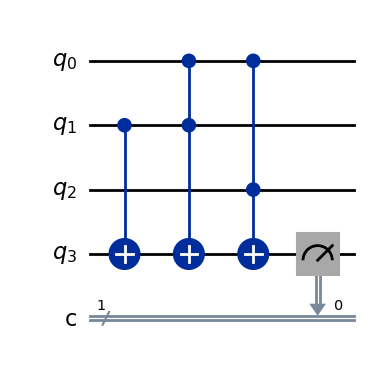

In [8]:
qc = QuantumCircuit(4, 1) #creating a quantum circuit with four qubits and one classical bit

# Applying gates to specific qubit
qc.cx(1, 3)           # CX from q1 to q3
qc.ccx(0, 1, 3)       # Toffoli gate on q0 and q1 -> q3
qc.ccx(0, 2, 3)       # Toffoli gate on q1 and q2 -> q3

# Measure q3 into classical bit 0
qc.measure(3, 0) #measuring qubit 3 onto classical bit
print('Multiplexer')
qc.draw('mpl') #drawing quantum circuit

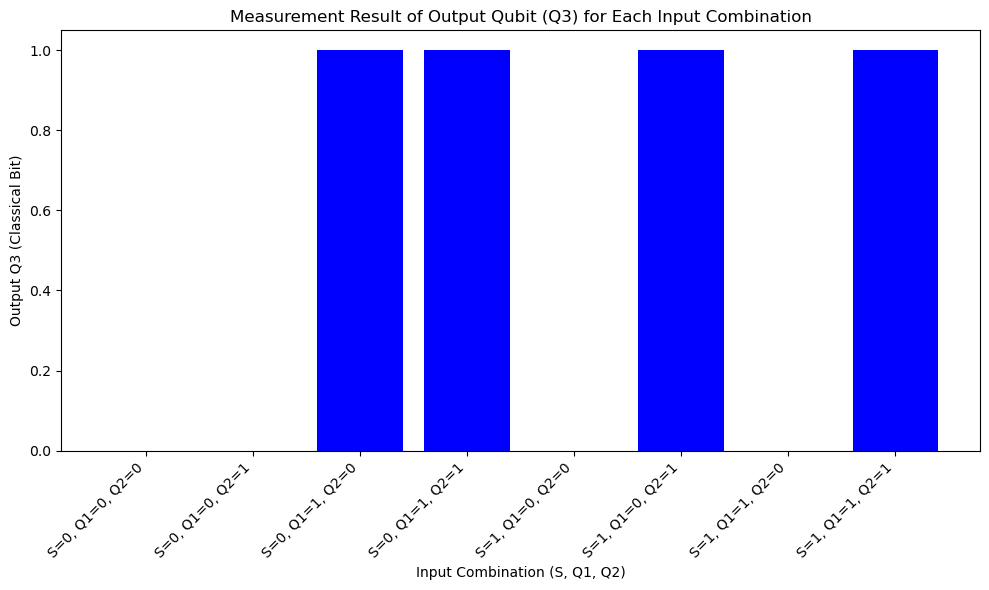

In [9]:
# Create a function to initialize q0, q1, q2 and simulate the circuit
def run_simulation(q0_val, q1_val, q2_val):
    # Create a quantum circuit with 4 qubits and 1 classical bit
    qc = QuantumCircuit(4, 1)

    # Initialize q0, q1, q2 with the values provided
    if q0_val == 1:
        qc.x(0)  # Flip q0 to 1 if q0_val is 1
    if q1_val == 1:
        qc.x(1)  # Flip q1 to 1 if q1_val is 1
    if q2_val == 1:
        qc.x(2)  # Flip q2 to 1 if q2_val is 1

    # Apply the gates
    qc.cx(1, 3)           # CX from q1 to q3
    qc.ccx(0, 1, 3)       # Toffoli gate from q0 and q1 -> q3
    qc.ccx(0, 2, 3)       # Toffoli gate from q0 and q2 -> q3

    # Measure q3 into classical bit
    qc.measure(3, 0)

    # Use the AerSimulator to simulate the quantum circuit
    simulator = AerSimulator()
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit).result()

    # Get the results of the measurement and return the counts
    counts = result.get_counts(qc)
    return counts

# Initialize lists to store results
input_combinations = []
q3_outputs = []

# Loop through all combinations of q0, q1, q2 (000, 001, 010, ..., 111)
# Going through each input of the multiplexer truth table
for q0 in [0, 1]:
    for q1 in [0, 1]:
        for q2 in [0, 1]:
            # Run the simulation for this combination of q0, q1, q2
            result = run_simulation(q0, q1, q2)
            # Get the measurement result for q3
            q3_value = '1' if '1' in result else '0'
            # Store the input combination and q3 output
            input_combinations.append(f'S={q0}, Q1={q1}, Q2={q2}')
            q3_outputs.append(int(q3_value))

# Create a bar chart to visualize the results
plt.figure(figsize=(10, 6))
plt.bar(input_combinations, q3_outputs, color='blue')
plt.xlabel('Input Combination (S, Q1, Q2)')
plt.ylabel('Output Q3 (Classical Bit)')
plt.title('Measurement Result of Output Qubit (Q3) for Each Input Combination')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()